First, we will load the tidyverse and tidymodels packages to allow for us to manipulate and visualize the data.

In [4]:
install.packages("tidyverse")
install.packages("tidymodels")
install.packages("dplyr")
library(tidyverse)
library(tidymodels)
library(dplyr)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



ERROR: Error: package or namespace load failed for ‘tidymodels’ in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace ‘rlang’ 1.1.4 is already loaded, but >= 1.1.5 is required


We will then load in the two datasets into R and examine the data know whether if it's Tidy or not.

In [24]:
players <- read_csv("data/players.csv") |>
arrange(by = desc(played_hours)) 
sessions <- read_csv("data/sessions.csv")

players_summary_hours <- players |>
select(played_hours) |>
map_dbl(mean, na.rm = TRUE)

players_summary_hours
players_summary_age <- players |>
select(Age) |>
map_dbl(mean, na.rm = TRUE)

players_summary_age

sessions_summary <- sessions |>
mutate(time_played = original_end_time - original_start_time) |>
select(time_played) |>
map_dbl(mean, na.rm = TRUE)

sessions_summary

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


played_hours 
    5.845918

Age 
20.52062

time_played 
    2909328

We will load the two datasets and see if there are any relationships between the two variables of our choice. We will choose our variables based on our research question. I chose to examine whether different "kinds" of players are more likely to contribute a large amount of data. I will focus on two variables, reported skill and gender, as well as time played. Time played will be our data and we can assume that with more time played, we will receive more data. We will investigate to see if gender or reported skill has any correlation with the amount of data we can receive.

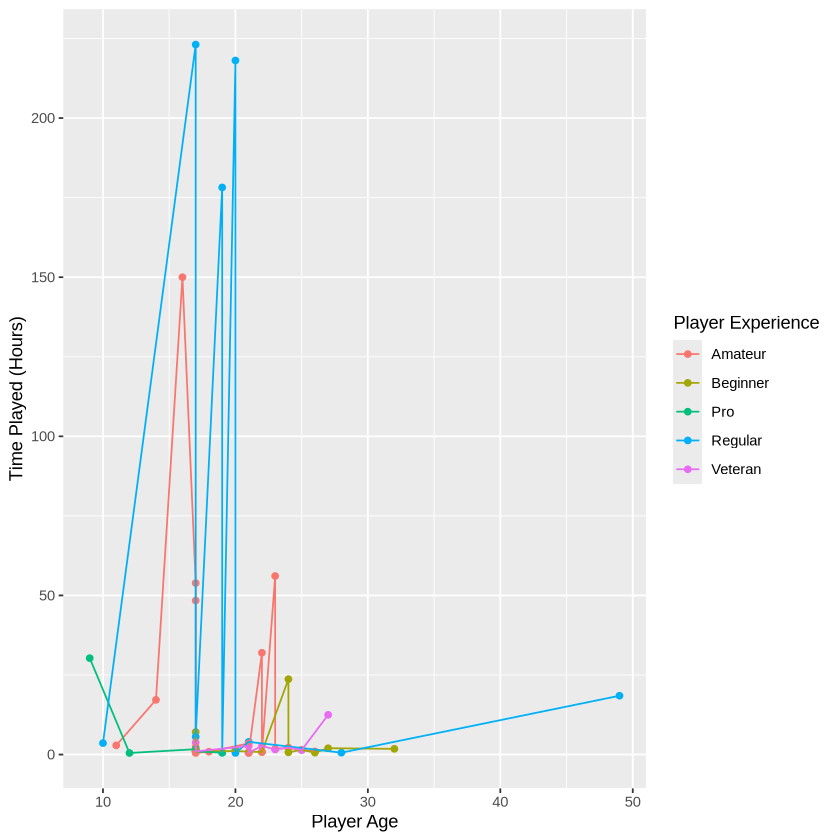

In [17]:
player_age_plot <- players |>
               ggplot(aes(x = Age, y = played_hours, color = experience)) +
               geom_point() +
               geom_line() +
               labs(x = "Player Age", y = "Time Played (Hours)", color = "Player Experience")

player_age_plot

We can then filter mutate the datasets as needed. We will filter for players who contributed more than 0.166667 hours or 10 minutes as well as filter out the sessions that lasted for 0 seconds. We can see right now from the graph that regular players seem to be the ones that play the longest, contributing the most data.

In [37]:
players_filtered <- players |>
filter(played_hours >= 0.166667)

players_filtered

sessions_mutate <- sessions |>
mutate(time_played = original_end_time - original_start_time) |>
arrange(by = desc(time_played)) |>
filter(time_played != 0)

sessions_mutate

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Regular,TRUE,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,223.1,Hiroshi,Male,17
Regular,TRUE,b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,218.1,Akio,Non-binary,20
Regular,TRUE,ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,178.2,Piper,Female,19
Amateur,TRUE,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,150.0,Delara,Female,16
Amateur,TRUE,fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,56.1,Dana,Male,23
Amateur,TRUE,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,53.9,Alex,Male,17
Amateur,TRUE,a175d4741dc84e6baf77901f6e8e0a06f54809a34e6b5211159bced346f7fb3e,48.4,Xander,Female,17
Amateur,TRUE,24d4892c2c3ce11d3e54c3bf31ee218901cac7a2f564911d67424c8fdf0874fe,32.0,Sidney,Male,22
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9


hashedEmail,start_time,end_time,original_start_time,original_end_time,time_played
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,30/06/2024 16:21,30/06/2024 20:32,1.71976e+12,1.71978e+12,2e+07
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,01/07/2024 21:53,02/07/2024 02:05,1.71987e+12,1.71989e+12,2e+07
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,29/08/2024 01:17,29/08/2024 05:32,1.72489e+12,1.72491e+12,2e+07
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,03/08/2024 04:59,03/08/2024 09:12,1.72266e+12,1.72268e+12,2e+07
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,30/08/2024 21:36,31/08/2024 01:14,1.72505e+12,1.72507e+12,2e+07
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,03/08/2024 21:36,04/08/2024 01:51,1.72272e+12,1.72274e+12,2e+07
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,29/06/2024 20:45,30/06/2024 00:36,1.71969e+12,1.71971e+12,2e+07
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,24/07/2024 20:50,25/07/2024 00:35,1.72185e+12,1.72187e+12,2e+07
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,16/05/2024 10:18,16/05/2024 13:27,1.71585e+12,1.71587e+12,2e+07
